### 230521 하은서 필수과제2

- crime 데이터를 가지고 시계열 데이터 분석을 진행해 주세요.
- 제공된 컬럼을 가지고 범죄건과 비교해서 시계열 데이터 분석을 진행해 주세요!
- ex) OFFENSE_TYPE_ID 해당 컬럼과 범죄건수와 시계열적인 패턴까지 다 엮어서 어떤식으로 되는지 비교분석이 가능하다.

In [100]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
crime = pd.read_csv('crime.csv')
crime.head()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [7]:
# REPORTED_DATE 데이터 타입 바꾸기
crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])

In [69]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


#### 가장 많이 발생하는 범죄유형 분석 후 연도별로 범죄사고 추이 확인하기

In [70]:
crime['OFFENSE_CATEGORY_ID'].value_counts(ascending=False)

traffic-accident                125060
all-other-crimes                 72343
public-disorder                  50807
larceny                          48351
theft-from-motor-vehicle         35945
drug-alcohol                     28984
burglary                         26606
auto-theft                       23453
other-crimes-against-persons     21137
aggravated-assault               10961
robbery                           6559
white-collar-crime                6219
sexual-assault                    3615
arson                              602
murder                             269
Name: OFFENSE_CATEGORY_ID, dtype: int64

In [71]:
# 2014~ 2017년임을 확인할 수 있다
crime.tail()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0
460910,460910,theft-other,larceny,2017-09-12 09:30:00,-104.985739,39.735045,capitol-hill,1,0


In [73]:
# year 추출
crime['year']=crime['REPORTED_DATE'].dt.year
crime.head()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,year
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1,2014
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0,2014
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0,2014
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0,2014
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0,2014


In [74]:
# 칼럼을 index로 지정
crime_dt = crime.set_index('REPORTED_DATE')
crime_dt

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,year
REPORTED_DATE,,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,2014
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,2014
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,2014
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,2014
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,2014
...,...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,2017
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,2017
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,2017


In [92]:
# 2014년
dt_14= crime_dt.loc['2014'].sort_index()
dt_14 = dt_14.query('OFFENSE_CATEGORY_ID=="traffic-accident"')
dt_14 = dt_14[['OFFENSE_CATEGORY_ID','year']]
dt_14

,OFFENSE_CATEGORY_ID,year
REPORTED_DATE,,
2014-01-01 01:05:00,traffic-accident,2014
2014-01-01 01:35:00,traffic-accident,2014
2014-01-01 01:40:00,traffic-accident,2014
2014-01-01 03:58:00,traffic-accident,2014
2014-01-01 04:00:00,traffic-accident,2014
...,...,...
2014-12-31 22:59:00,traffic-accident,2014
2014-12-31 23:26:00,traffic-accident,2014
2014-12-31 23:36:00,traffic-accident,2014


In [93]:
# 2015년
dt_15= crime_dt.loc['2015'].sort_index()
dt_15 = dt_15.query('OFFENSE_CATEGORY_ID=="traffic-accident"')
dt_15 = dt_15[['OFFENSE_CATEGORY_ID','year']]
dt_15

,OFFENSE_CATEGORY_ID,year
REPORTED_DATE,,
2015-01-01 00:43:00,traffic-accident,2015
2015-01-01 01:38:00,traffic-accident,2015
2015-01-01 01:43:00,traffic-accident,2015
2015-01-01 01:49:00,traffic-accident,2015
2015-01-01 02:09:00,traffic-accident,2015
...,...,...
2015-12-31 22:08:00,traffic-accident,2015
2015-12-31 22:13:00,traffic-accident,2015
2015-12-31 22:42:00,traffic-accident,2015


In [121]:
# 2016년
dt_16= crime_dt.loc['2016'].sort_index()
dt_16 = dt_16.query('OFFENSE_CATEGORY_ID=="traffic-accident"')
dt_16 = dt_16[['OFFENSE_CATEGORY_ID','year']]
dt_16

,OFFENSE_CATEGORY_ID,year
REPORTED_DATE,,
2016-01-01 00:37:00,traffic-accident,2016
2016-01-01 00:40:00,traffic-accident,2016
2016-01-01 01:13:00,traffic-accident,2016
2016-01-01 01:15:00,traffic-accident,2016
2016-01-01 02:25:00,traffic-accident,2016
...,...,...
2016-12-31 20:46:00,traffic-accident,2016
2016-12-31 21:33:00,traffic-accident,2016
2016-12-31 21:47:00,traffic-accident,2016


In [122]:
# 2017년
dt_17= crime_dt.loc['2017'].sort_index()
dt_17 = dt_17.query('OFFENSE_CATEGORY_ID=="traffic-accident"')
dt_17 = dt_17[['OFFENSE_CATEGORY_ID','year']]
dt_17

,OFFENSE_CATEGORY_ID,year
REPORTED_DATE,,
2017-01-01 02:04:00,traffic-accident,2017
2017-01-01 02:47:00,traffic-accident,2017
2017-01-01 02:56:00,traffic-accident,2017
2017-01-01 03:01:00,traffic-accident,2017
2017-01-01 03:20:00,traffic-accident,2017
...,...,...
2017-09-28 21:59:00,traffic-accident,2017
2017-09-28 22:55:00,traffic-accident,2017
2017-09-28 23:02:00,traffic-accident,2017


In [138]:
sp = pd.concat([dt_14,dt_15,dt_16,dt_17])
sp_p = sp['year'].value_counts().sort_index()
sp_p

2014    21731
2015    23254
2016    23695
2017    17800
Name: year, dtype: int64

<Axes: >

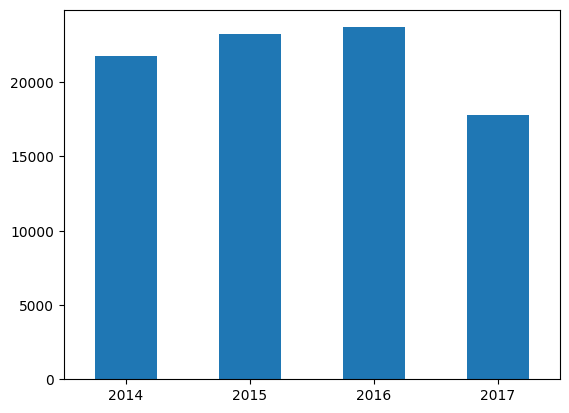

In [141]:
sp_p.plot.bar(rot=0)

- 2014~2016 교통사고가 증가하고 있다는 것을 볼 수 있다. 
- 2017년은 2016보다 사고 횟수가 적지만 7월달까지만 데이터가 있다는 점에서 정확하지 않을 수 있다.

### 2016년 월 별 범죄 수

In [143]:
crime_dt

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,year
REPORTED_DATE,,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,2014
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,2014
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,2014
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,2014
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,2014
...,...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,2017
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,2017
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,2017


In [151]:
crime_dt16 = crime_dt.loc['2016'].sort_index()
crime_dt16

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,year
REPORTED_DATE,,,,,,,,,
2016-01-01 00:17:00,375076,assault-simple,other-crimes-against-persons,-105.044064,39.696096,mar-lee,1,0,2016
2016-01-01 00:25:00,283748,aggravated-assault,aggravated-assault,-104.993574,39.739773,civic-center,1,0,2016
2016-01-01 00:30:00,272581,disturbing-the-peace,public-disorder,-104.974995,39.767704,five-points,1,0,2016
2016-01-01 00:33:00,286739,traf-other,all-other-crimes,-104.940621,39.751036,south-park-hill,1,0,2016
2016-01-01 00:37:00,284245,traffic-accident-hit-and-run,traffic-accident,-104.986106,39.747526,north-capitol-hill,0,1,2016
...,...,...,...,...,...,...,...,...,...
2016-12-31 23:16:00,346842,traffic-accident-dui-duid,traffic-accident,-105.025137,39.725426,barnum,0,1,2016
2016-12-31 23:23:00,367058,harassment-dv,public-disorder,-104.978298,39.740637,north-capitol-hill,1,0,2016
2016-12-31 23:27:00,361186,drug-cocaine-possess,drug-alcohol,-104.992172,39.714807,baker,1,0,2016


In [160]:
crime_sp16 = crime_dt16['IS_CRIME']

In [161]:
# 월 별
crime_spw16 = crime_sp16.resample('M').sum()
crime_spw16

REPORTED_DATE
2016-01-31    5723
2016-02-29    5177
2016-03-31    5523
2016-04-30    5836
2016-05-31    6003
2016-06-30    5708
2016-07-31    5534
2016-08-31    5983
2016-09-30    5910
2016-10-31    5946
2016-11-30    5076
2016-12-31    4962
Freq: M, Name: IS_CRIME, dtype: int64

<Axes: xlabel='REPORTED_DATE'>

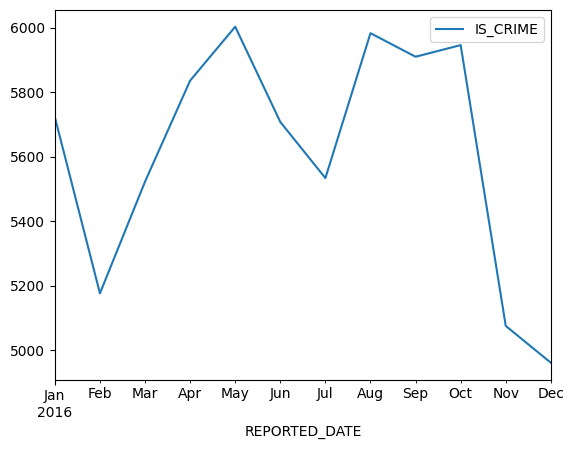

In [163]:
crime_spw16.plot(legend=True)

- 2016년도 5월에 범죄가 가장 많이 발생한 것을 알 수 있다

In [164]:
crime_dt.loc['2014'].sort_index()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,year
REPORTED_DATE,,,,,,,,,
2014-01-01 00:08:00,99814,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1,0,2014
2014-01-01 00:08:00,214696,traf-habitual-offender,all-other-crimes,-104.841945,39.773764,stapleton,1,0,2014
2014-01-01 00:38:00,224109,theft-of-motor-vehicle,auto-theft,-104.890345,39.782623,stapleton,1,0,2014
2014-01-01 00:39:00,83972,robbery-street,robbery,-104.979260,39.753859,five-points,1,0,2014
2014-01-01 01:00:00,236308,aggravated-assault,aggravated-assault,-105.048852,39.731369,villa-park,1,0,2014
...,...,...,...,...,...,...,...,...,...
2014-12-31 23:59:00,226091,weapon-carrying-concealed,all-other-crimes,-105.017647,39.718170,valverde,1,0,2014
2014-12-31 23:59:00,148309,traffic-accident,traffic-accident,-105.040484,39.751199,sloan-lake,0,1,2014
2014-12-31 23:59:00,97411,assault-dv,other-crimes-against-persons,-105.017647,39.718170,valverde,1,0,2014
